In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import warnings
warnings.filterwarnings('ignore')
import scipy
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv("attrition_hr.csv")
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [3]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [4]:
df.shape

(1470, 35)

In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [7]:
df['JobSatisfaction'].value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

Text(0.5, 1.0, 'job satisfaction')

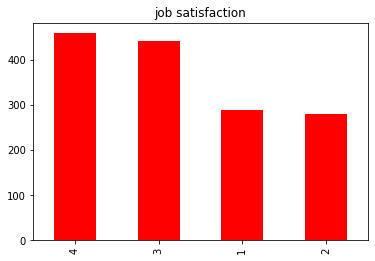

In [8]:
df['JobSatisfaction'].value_counts().plot.bar(color="red")
plt.title('job satisfaction')

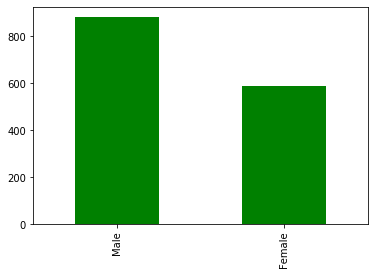

In [9]:
df['Gender'].value_counts().plot.bar(color="green")
#more males present

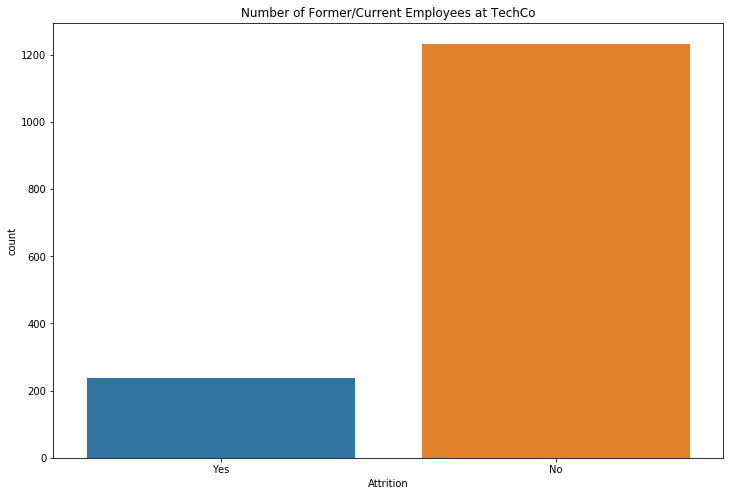

In [10]:
df['Attrition'] = df['Attrition'].replace("Termination", "Voluntary Resignation")
df['Attrition'] = df['Attrition'].replace("Voluntary Resignation", "Former Employees")
df['Attrition'] = df['Attrition'].replace("Current employee", "Current Employees")

plt.figure(figsize=(12,8))
plt.title('Number of Former/Current Employees at TechCo')
sns.countplot(x="Attrition", data=df)

# yes represents current employee no represents former employee

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(1470, 35)

In [13]:
crosstabcat = pd.crosstab([df.Department,df.Gender,df.MaritalStatus], df['Attrition'],normalize='columns')
print(crosstabcat)
# comparing dep,gender and marital status and then the attrition on basis of that

Attrition                                          No       Yes
Department             Gender MaritalStatus                    
Human Resources        Female Divorced       0.000811  0.012658
                              Married        0.006488  0.012658
                              Single         0.004055  0.000000
                       Male   Divorced       0.008110  0.008439
                              Married        0.016221  0.012658
                              Single         0.005677  0.004219
Research & Development Female Divorced       0.064071  0.016878
                              Married        0.120843  0.075949
                              Single         0.087591  0.088608
                       Male   Divorced       0.103001  0.059072
                              Married        0.190592  0.130802
                              Single         0.105434  0.189873
Sales                  Female Divorced       0.022709  0.008439
                              Married   

Text(0.5, 0.98, 'Attrition Counts by whether an Employee worked Over Time')

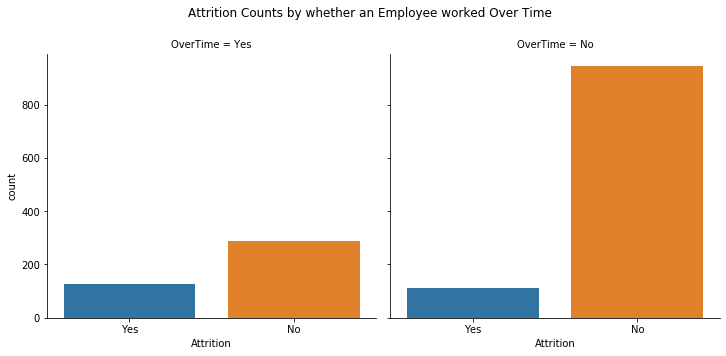

In [14]:
sns.factorplot("Attrition", col="OverTime", data=df, kind="count", col_wrap=2, size=5)
plt.subplots_adjust(top=.85)
plt.suptitle('Attrition Counts by whether an Employee worked Over Time')
#yes denotes former employee no denotes current employee so a more the people work overtime more they tend to leave

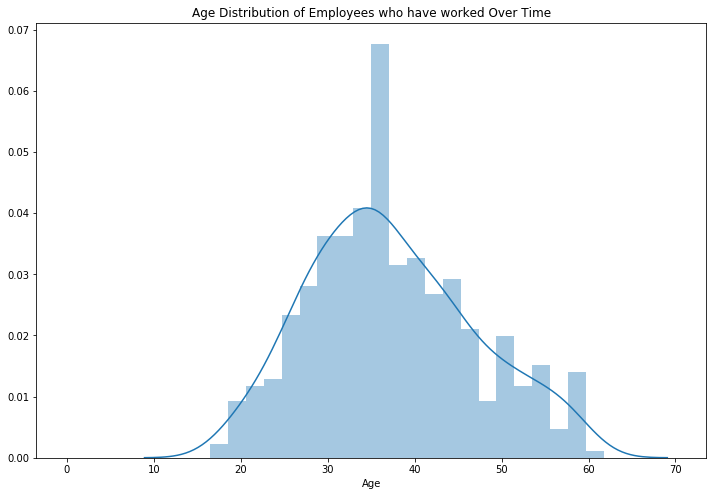

In [15]:
plt.figure(figsize=(12,8))
plt.title('Age Distribution of Employees who have worked Over Time')

sns.distplot(df.Age[df.OverTime == 'Yes'], bins = np.linspace(0,70,35))
# overtime is distributed over all ages nd not bounded to a specific category

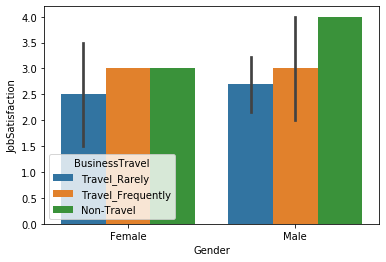

In [16]:
sns.barplot(x="Gender", y="JobSatisfaction", hue="BusinessTravel", data=df[:25])
# we can see job satsifaction among diffrent gender and also classify their type of business travel
#here male which are non travellers have highest job satisfaction

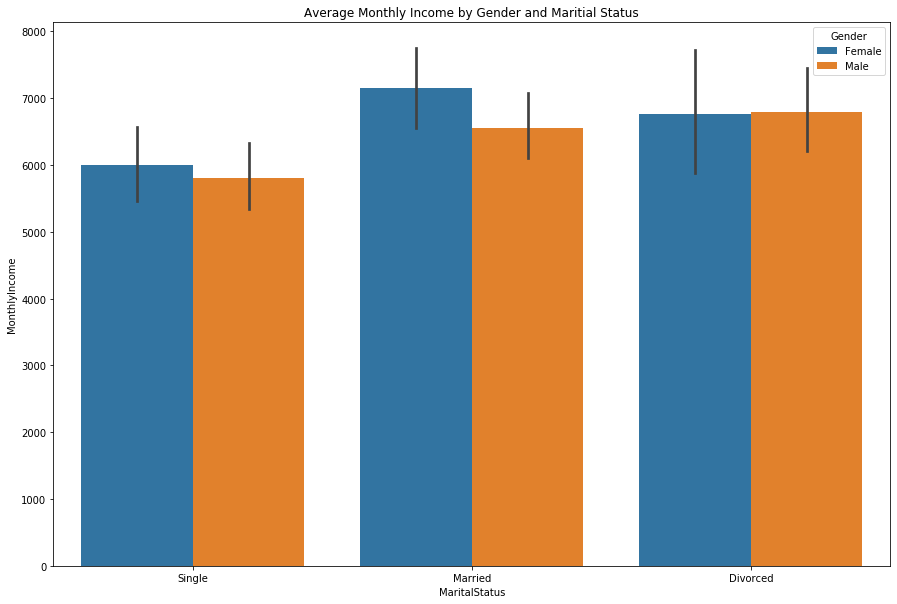

In [17]:
plt.figure(figsize=(15,10))
plt.title('Average Monthly Income by Gender and Maritial Status')
sns.barplot(x="MaritalStatus", y="MonthlyIncome", hue="Gender", data=df)
# married feamle have highest average monthly income

In [18]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

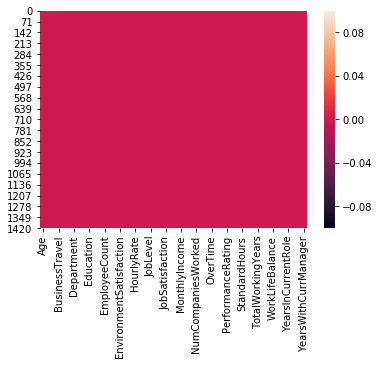

In [19]:
sns.heatmap(df.isnull())

In [20]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


In [21]:
dfcor=df.corr()

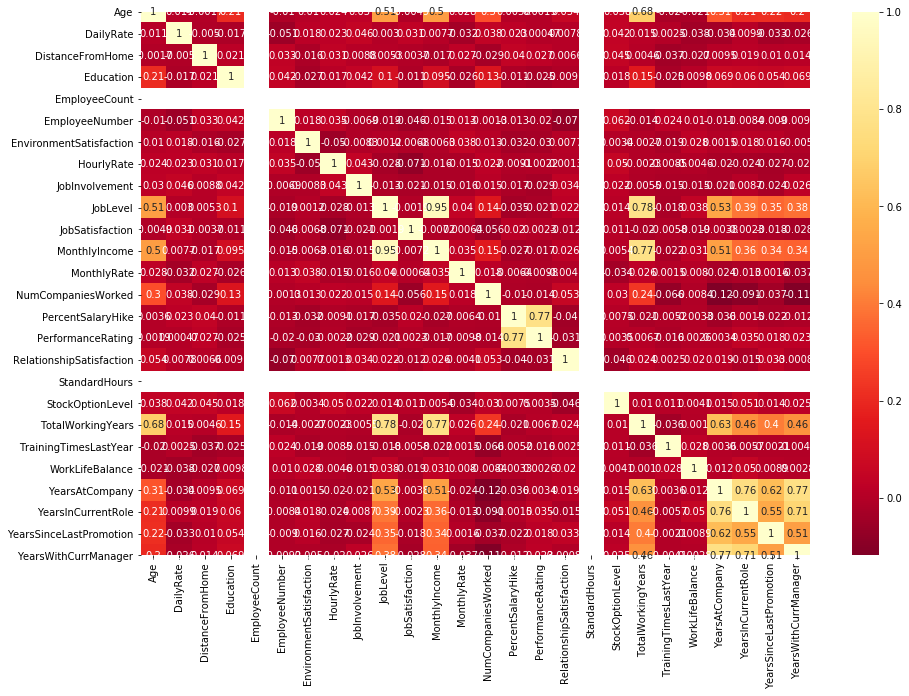

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)

In [23]:
# we can see many useless features with poor correlation lets clean up our data
# lets seperate strongly correlated variables and remove poorly correlated feature such as standard hours employee count
df_sc = df[['Age','DailyRate','DistanceFromHome', 
                       'EnvironmentSatisfaction', 'HourlyRate',                     
                       'JobInvolvement', 'JobLevel',
                       'JobSatisfaction', 
                       'RelationshipSatisfaction', 
                       'StockOptionLevel',
                        'TrainingTimesLastYear']].copy()
df_sc.head()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear
0,41,1102,1,2,94,3,2,4,1,0,0
1,49,279,8,3,61,2,2,2,4,1,3
2,37,1373,2,4,92,2,1,3,2,0,3
3,33,1392,3,4,56,3,1,3,3,0,3
4,27,591,2,1,40,3,1,2,4,1,3


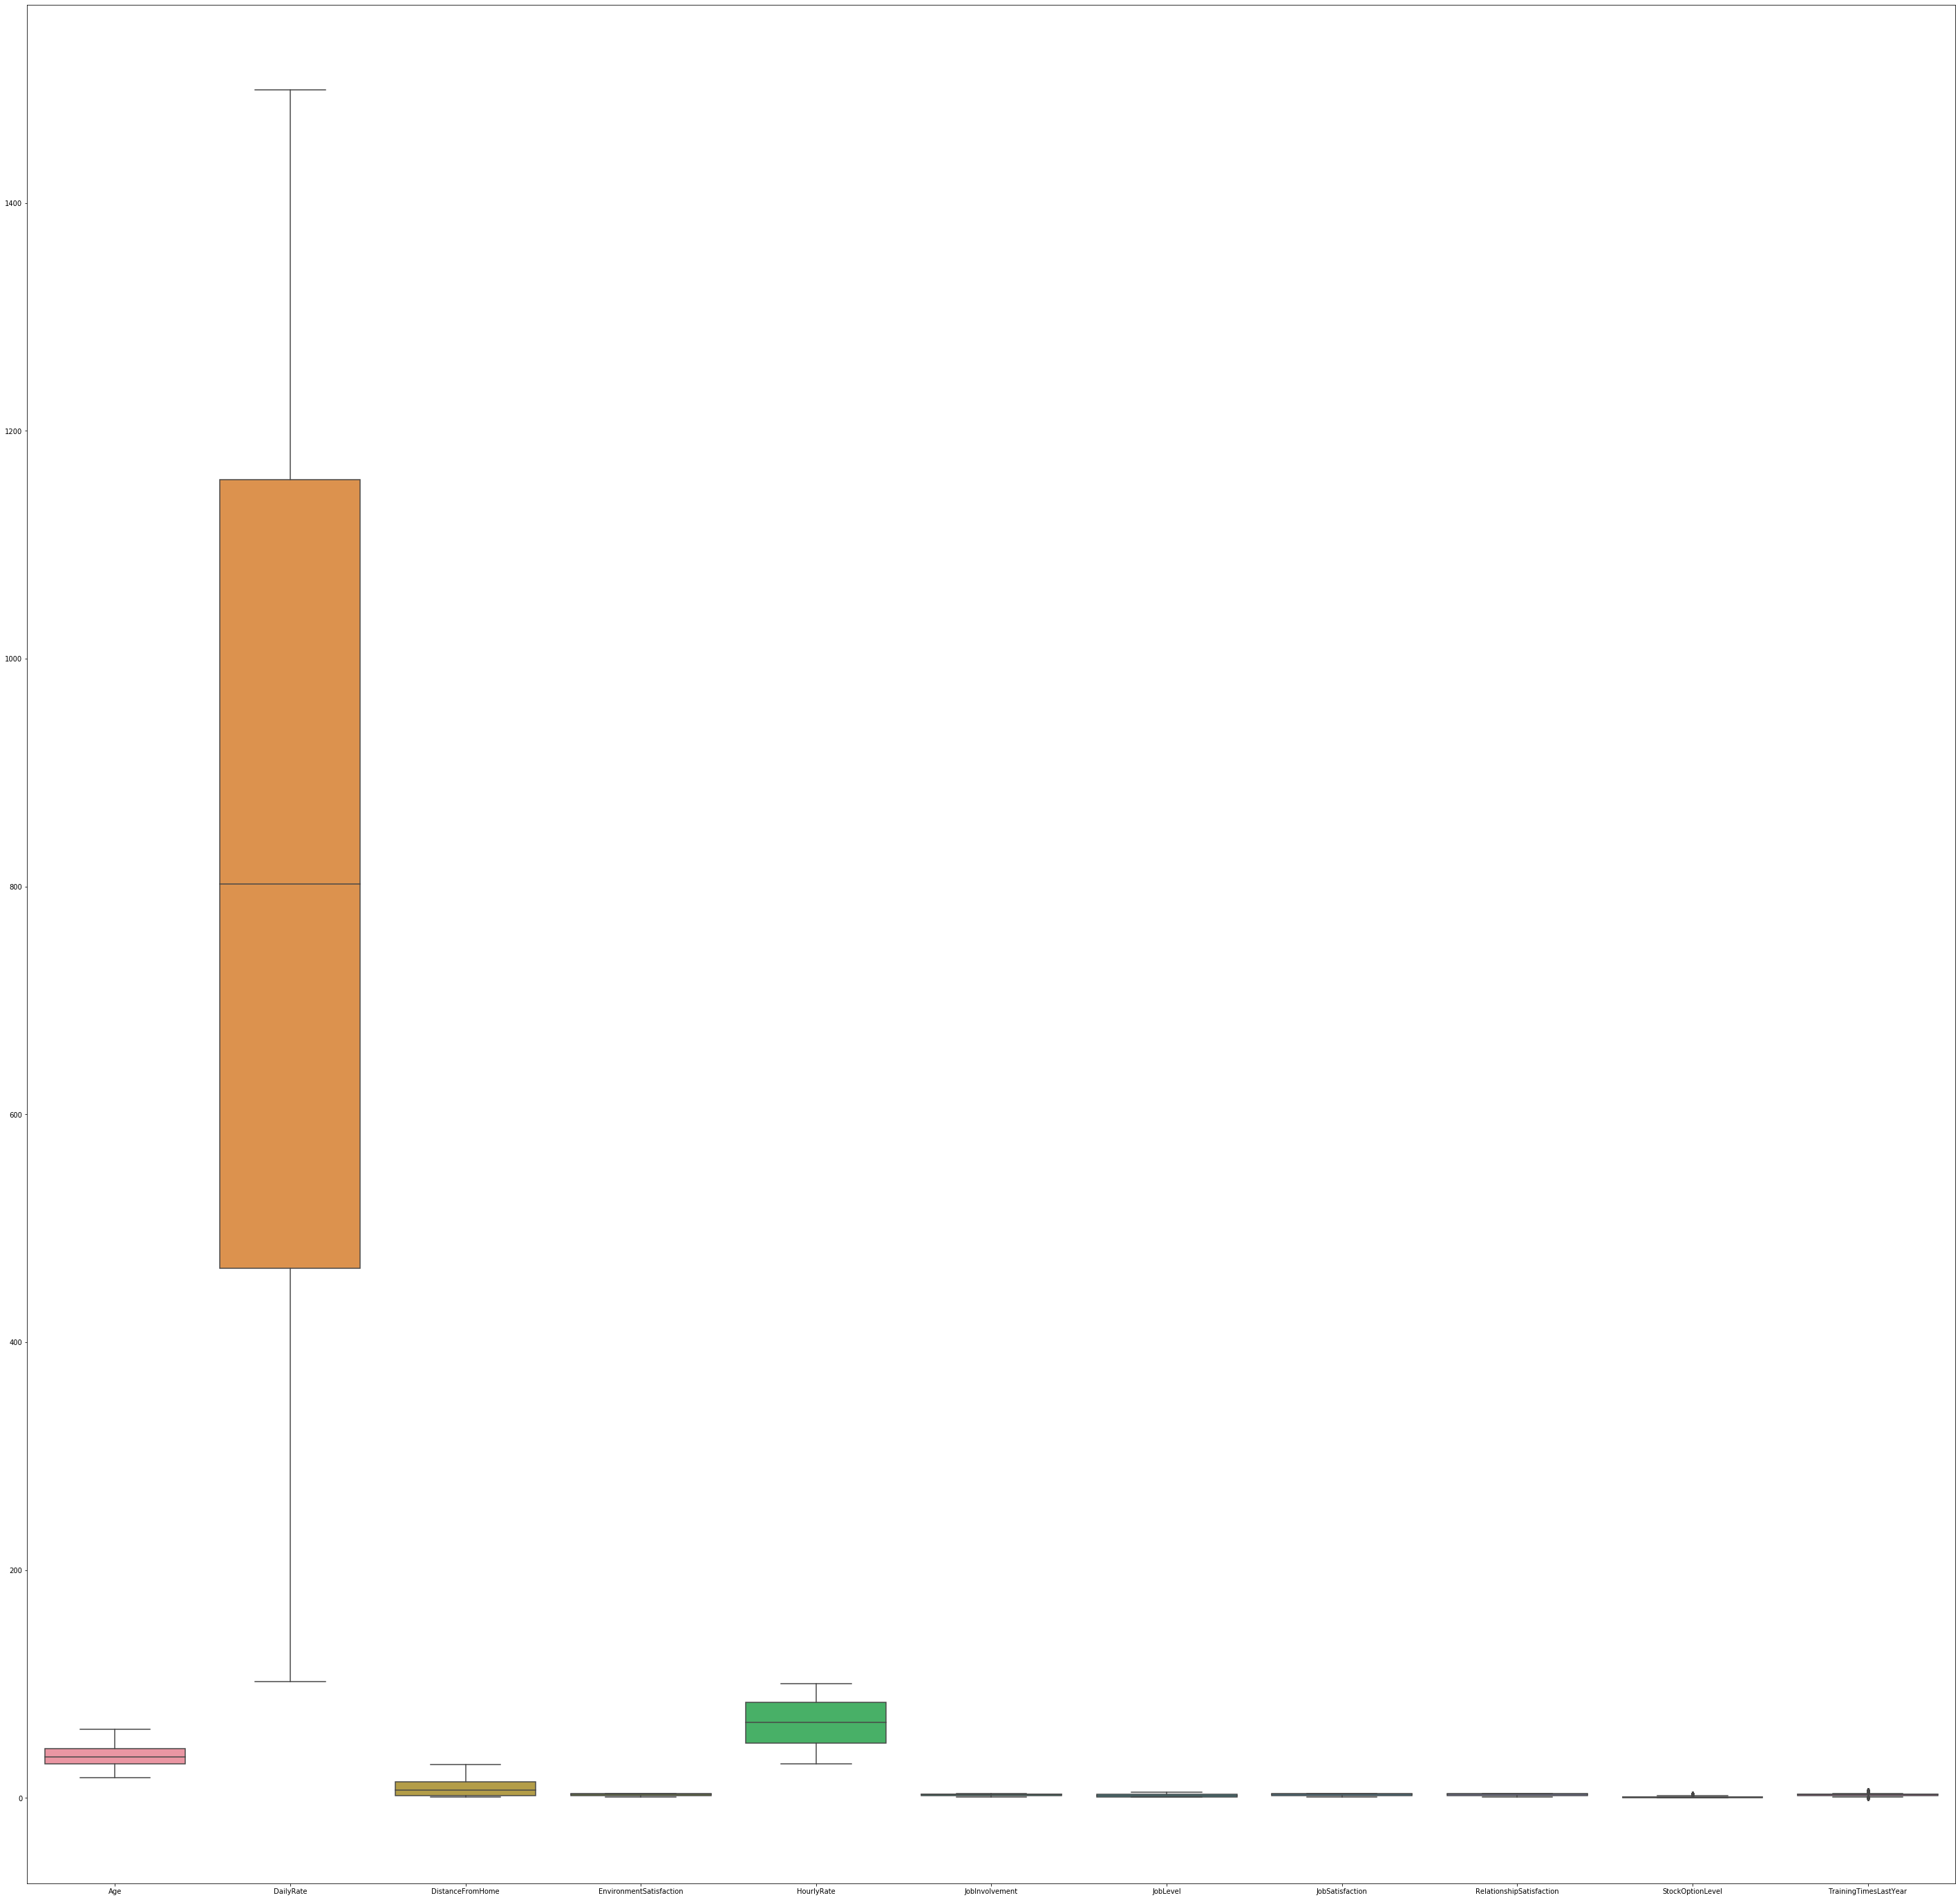

In [24]:
plt.figure(figsize = (50,50))
sns.boxplot(data=df_sc)
# lets check outliers 
#all clear no outliers

In [25]:
# working on categorical data
df_cat = df[['Attrition', 'BusinessTravel','Department',
                       'EducationField','Gender','JobRole',
                       'MaritalStatus',
                       'Over18', 'OverTime']].copy()
df_cat.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [26]:
Num_val = {'Yes':1, 'No':0}
df_cat['Attrition'] = df_cat["Attrition"].apply(lambda x: Num_val[x])
df_cat.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,1,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,0,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,1,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,0,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,0,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [27]:
df_cat = pd.get_dummies(df_cat)
df_cat.head()

,Attrition,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,1,0,0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,1,1,0,1
1,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,1,1,0
2,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
3,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,1,0,1
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0


In [28]:
df_final = pd.concat([df_sc, df_cat], axis=1)
df_final.head()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,RelationshipSatisfaction,StockOptionLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,94,3,2,4,1,0,...,0,0,1,0,0,0,1,1,0,1
1,49,279,8,3,61,2,2,2,4,1,...,0,1,0,0,0,1,0,1,1,0
2,37,1373,2,4,92,2,1,3,2,0,...,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,56,3,1,3,3,0,...,0,1,0,0,0,1,0,1,0,1
4,27,591,2,1,40,3,1,2,4,1,...,0,0,0,0,0,1,0,1,1,0


In [29]:
x = df_final.drop('Attrition', axis = 1)
y= df_final['Attrition']


In [30]:
lm = LogisticRegression()

In [31]:
from sklearn.decomposition import PCA
pca_new = PCA(n_components=10)
x = pca_new.fit_transform(x)

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=50)

In [33]:
lm.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
lm = LogisticRegression()
lm.fit(x_train, y_train)
lm_predict = lm.predict(x_test)

In [35]:
lm_conf_matrix = confusion_matrix(y_test, lm_predict)
lm_acc_score = accuracy_score(y_test, lm_predict)
print(lm_conf_matrix)
print(lm_acc_score)

[[402   2]
 [ 78   4]]
0.8353909465020576


In [36]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100)
rfr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_predict=rf.predict(x_test)

In [38]:
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score)

[[394  10]
 [ 74   8]]
0.8271604938271605


In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)

In [41]:
print(classification_report(y_test,predknn))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       404
           1       0.00      0.00      0.00        82

    accuracy                           0.83       486
   macro avg       0.42      0.50      0.45       486
weighted avg       0.69      0.83      0.75       486



In [42]:
from sklearn.svm import SVC

In [43]:
lin_svc = SVC()
lin_svc.fit(x_train, y_train)
lin_svc=rf.predict(x_test)

In [44]:
lin_svc_conf_matrix = confusion_matrix(y_test, rf_predict)
lin_svc_acc_score = accuracy_score(y_test, rf_predict)
print(lin_svc_conf_matrix)
print(lin_svc_acc_score)

[[394  10]
 [ 74   8]]
0.8271604938271605


In [45]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    score=cross_val_score(svc,x,y,cv=15)

    print('Mean Scores',score.mean())
    print('Standard deviation',score.std())

    y_pred=cross_val_predict(svc,x,y,cv=10)


    conf_mat=confusion_matrix(y,y_pred)
    print(conf_mat)

In [46]:
svmkernel('rbf')

Mean Scores 0.8387897489517521
Standard deviation 0.0033470451000202255
[[1233    0]
 [ 237    0]]


In [47]:
dtc=DecisionTreeClassifier(criterion='gini')
score=cross_val_score(dtc,x,y,cv=5,scoring='f1_macro')
print('F1-score=',score)
print('Mean Scores',score.mean())
print('Standard deviation',score.std())

y_pred=cross_val_predict(dtc,x,y,cv=5)

print('Y Prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat

F1-score= [0.50130629 0.53408624 0.5697012  0.55386831 0.58268713]
Mean Scores 0.5483298340692829
Standard deviation 0.028572463125258088
Y Prediction values
[0 0 0 ... 0 0 1]


array([[1064,  169],
       [ 168,   69]], dtype=int64)

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge
ls=Lasso()
ls.fit(x_train,y_train)
print(ls.score(x_train,y_train))
alphavalue={'alpha':[1,0.1,0.01,0.001,0.0001,0]}
model=Ridge()
grid=GridSearchCV(estimator=model,param_grid=alphavalue)
grid.fit(x,y)
print(grid)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

0.0059770014803185445
GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
1
{'alpha': 1}


In [49]:
rd=Ridge(alpha=1)
rd.fit(x,y)
print(rd.coef_)
print(rd.score(x_test,y_test))

[ 5.16486461e-05  1.08534878e-04 -6.43287986e-03  3.45578724e-03
 -1.61447578e-02  1.14484601e-02  4.38842485e-02 -1.05423899e-03
 -3.22884172e-02 -6.24052663e-02]
0.12498392828708184


In [50]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=100)
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.7962962962962963
[[365  39]
 [ 60  22]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       404
           1       0.36      0.27      0.31        82

    accuracy                           0.80       486
   macro avg       0.61      0.59      0.59       486
weighted avg       0.77      0.80      0.78       486



In [51]:
sv=SVC()
score=cross_val_score(sv,x,y,cv=5,scoring='accuracy')
print('accuracy score=',score)
print('Mean Scores',score.mean())
print('Standard deviation',score.std())

y_pred=cross_val_predict(sv,x,y,cv=5)

print('Y Prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat

from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

accuracy score= [0.83728814 0.83728814 0.84013605 0.83959044 0.83959044]
Mean Scores 0.8387786425960446
Standard deviation 0.0012331935075144994
Y Prediction values
[0 0 0 ... 0 0 0]


0.8387755102040816

In [52]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score


In [53]:
y_pred_prob=lm.predict_proba(x_test)[:,1]

In [54]:
y_pred_prob

array([0.34947971, 0.03409382, 0.23416921, 0.40052938, 0.0872673 ,
       0.04713237, 0.30984534, 0.1966023 , 0.22790359, 0.12032603,
       0.62382173, 0.07567312, 0.34065112, 0.42960986, 0.08894828,
       0.21107853, 0.05196307, 0.28742645, 0.1989858 , 0.07510769,
       0.2532975 , 0.13339335, 0.09921395, 0.11569114, 0.27937606,
       0.25104946, 0.06327628, 0.21647911, 0.20094121, 0.13070606,
       0.03005515, 0.05453926, 0.16026   , 0.29405212, 0.11475505,
       0.24362874, 0.06573888, 0.24444753, 0.0276888 , 0.04848092,
       0.32174186, 0.07701892, 0.09525583, 0.04615764, 0.07222774,
       0.40142053, 0.04468997, 0.09236962, 0.10681578, 0.04457668,
       0.42366639, 0.08277025, 0.27558036, 0.10636349, 0.15917546,
       0.15064754, 0.31755906, 0.09909183, 0.11298346, 0.13212507,
       0.18900839, 0.23615804, 0.06337282, 0.12461747, 0.04264693,
       0.31893761, 0.40837725, 0.0783248 , 0.10482178, 0.07429479,
       0.10601034, 0.16706046, 0.32186433, 0.46230691, 0.17280

In [55]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [56]:
fpr

array([0.        , 0.        , 0.00247525, 0.00247525, 0.0049505 ,
       0.0049505 , 0.00990099, 0.00990099, 0.01980198, 0.01980198,
       0.02227723, 0.02227723, 0.02475248, 0.02475248, 0.02722772,
       0.02722772, 0.02970297, 0.02970297, 0.03217822, 0.03217822,
       0.03465347, 0.03465347, 0.03712871, 0.03712871, 0.0470297 ,
       0.0470297 , 0.04950495, 0.04950495, 0.0519802 , 0.0519802 ,
       0.05445545, 0.05445545, 0.05940594, 0.05940594, 0.06435644,
       0.06435644, 0.08663366, 0.08663366, 0.08910891, 0.08910891,
       0.09158416, 0.09158416, 0.09653465, 0.09653465, 0.1039604 ,
       0.1039604 , 0.11386139, 0.11386139, 0.12623762, 0.12623762,
       0.13861386, 0.13861386, 0.1460396 , 0.1460396 , 0.14851485,
       0.14851485, 0.15841584, 0.15841584, 0.17079208, 0.17079208,
       0.17326733, 0.17326733, 0.17821782, 0.17821782, 0.20544554,
       0.20544554, 0.21782178, 0.21782178, 0.23514851, 0.23514851,
       0.23762376, 0.23762376, 0.24009901, 0.24009901, 0.24257

In [57]:
tpr

array([0.        , 0.01219512, 0.01219512, 0.02439024, 0.02439024,
       0.07317073, 0.07317073, 0.08536585, 0.08536585, 0.09756098,
       0.09756098, 0.1097561 , 0.1097561 , 0.12195122, 0.12195122,
       0.13414634, 0.13414634, 0.14634146, 0.14634146, 0.15853659,
       0.15853659, 0.17073171, 0.17073171, 0.18292683, 0.18292683,
       0.19512195, 0.19512195, 0.20731707, 0.20731707, 0.2195122 ,
       0.2195122 , 0.23170732, 0.23170732, 0.24390244, 0.24390244,
       0.25609756, 0.25609756, 0.26829268, 0.26829268, 0.2804878 ,
       0.2804878 , 0.29268293, 0.29268293, 0.30487805, 0.30487805,
       0.31707317, 0.31707317, 0.32926829, 0.32926829, 0.34146341,
       0.34146341, 0.35365854, 0.35365854, 0.37804878, 0.37804878,
       0.3902439 , 0.3902439 , 0.41463415, 0.41463415, 0.42682927,
       0.42682927, 0.43902439, 0.43902439, 0.45121951, 0.45121951,
       0.47560976, 0.47560976, 0.48780488, 0.48780488, 0.5       ,
       0.5       , 0.51219512, 0.51219512, 0.52439024, 0.52439

In [58]:
thresholds

array([1.62382173, 0.62382173, 0.55207954, 0.54919395, 0.5335443 ,
       0.48590443, 0.46289752, 0.46230691, 0.44484833, 0.4445626 ,
       0.44322729, 0.42960986, 0.42366639, 0.41056484, 0.40837725,
       0.40142053, 0.40052938, 0.40012859, 0.39886858, 0.3973606 ,
       0.38743558, 0.38561103, 0.38542247, 0.37749274, 0.36628364,
       0.36578997, 0.36382754, 0.36092202, 0.35777555, 0.35053871,
       0.34986157, 0.34947971, 0.34405688, 0.34321735, 0.34234213,
       0.34065112, 0.32062736, 0.31893761, 0.31755906, 0.31679644,
       0.31353542, 0.31190181, 0.30984534, 0.30916549, 0.2977577 ,
       0.29637   , 0.28946429, 0.28880765, 0.28337803, 0.28254328,
       0.27854834, 0.2777267 , 0.27558036, 0.27067202, 0.26912825,
       0.2687719 , 0.25788331, 0.25350408, 0.25104946, 0.24910843,
       0.24889019, 0.24813825, 0.24521173, 0.24493808, 0.2358918 ,
       0.23348088, 0.22876076, 0.22862909, 0.21625301, 0.21509461,
       0.21482399, 0.21445816, 0.21382852, 0.21379018, 0.21297

In [59]:
auc_score=roc_auc_score(y_test,lm.predict(x_test))

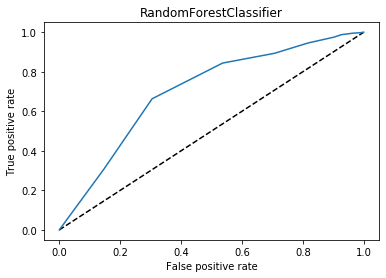

0.5364042501811157

In [60]:
y_pred_prob=rf.predict_proba(x_test)[:,0]
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()
auc_score=roc_auc_score(y_test,rf.predict(x_test))
auc_score

In [61]:
rfc_cv_score = cross_val_score(rf, x, y, cv=10)

In [62]:
rfc_cv_score

array([0.80405405, 0.83783784, 0.81756757, 0.80272109, 0.84353741,
       0.83673469, 0.85714286, 0.83561644, 0.8630137 , 0.82191781])

In [63]:
from sklearn.externals import joblib
joblib.dump(rf,'rfhr.obj')
rf_from_joblib=joblib.load('rfhr.obj')